In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fbprophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df=pd.read_csv('/content/ecom_walmart(1).csv')

In [ ]:
df1=pd.read_csv('/content/walmart_data(1)(1).csv')

In [ ]:
df

,Date,Walmart E-commerce sales(in millions)
0,2013-10-01,4476
1,2013-11-01,5691
2,2013-12-01,6465
3,2014-01-01,7419
4,2014-02-01,7840
...,...,...
80,2020-06-01,156391
81,2020-07-01,160414
82,2020-08-01,211595
83,2020-09-01,209251


In [ ]:
df1

,ds,y
0,2013-10-01,723582
1,2013-11-01,740394
2,2013-12-01,740192
3,2014-01-01,746589
4,2014-02-01,752210
...,...,...
80,2020-06-01,1381381
81,2020-07-01,1363543
82,2020-08-01,1311345
83,2020-09-01,1469769


In [ ]:
df1.info()

In [ ]:
df.corr()

,Walmart E-commerce sales(in millions)
Walmart E-commerce sales(in millions),1.0


In [ ]:
ecom_sales=df.copy()

In [ ]:
ecom_sales.columns=['ds','y']

In [ ]:
ecom_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      85 non-null     object
 1   y       85 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
ecom_sales

,ds,y
0,2013-10-01,4476
1,2013-11-01,5691
2,2013-12-01,6465
3,2014-01-01,7419
4,2014-02-01,7840
...,...,...
80,2020-06-01,156391
81,2020-07-01,160414
82,2020-08-01,211595
83,2020-09-01,209251


In [ ]:
#ecom_sales.to_csv('/content/ecom_walmart.csv')

In [ ]:
total_sales1=df1.copy()

In [ ]:
total_sales1.shape

(85, 2)

In [ ]:
total_sales1.tail

<bound method NDFrame.tail of             ds        y
0   2013-10-01   723582
1   2013-11-01   740394
2   2013-12-01   740192
3   2014-01-01   746589
4   2014-02-01   752210
..         ...      ...
80  2020-06-01  1381381
81  2020-07-01  1363543
82  2020-08-01  1311345
83  2020-09-01  1469769
84  2020-10-01  1476952

[85 rows x 2 columns]>

In [ ]:
total_sales.info()

NameError: ignored

In [ ]:
total_sales1['ds']=pd.to_datetime(total_sales1['ds'])

In [ ]:
total_sales1.head()

,ds,y
0,2013-10-01,723582
1,2013-11-01,740394
2,2013-12-01,740192
3,2014-01-01,746589
4,2014-02-01,752210


In [ ]:
#total_sales.to_csv('/content/walmart_data.csv')

In [ ]:
m = Prophet()
m.fit(total_sales1)
future = m.make_future_dataframe(periods=12,freq='M')
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
92,2021-05-31
93,2021-06-30
94,2021-07-31
95,2021-08-31
96,2021-09-30


In [ ]:
future.head()

,ds
0,2013-10-01
1,2013-11-01
2,2013-12-01
3,2014-01-01
4,2014-02-01


In [ ]:
forecast = round(m.predict(future),2)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
92,2021-05-31,1506028.89,1473608.36,1540232.60
93,2021-06-30,1522551.63,1488475.19,1556742.86
94,2021-07-31,1545800.69,1512592.54,1578128.30
95,2021-08-31,1490185.37,1455202.75,1525360.02
96,2021-09-30,1527254.71,1491552.73,1562967.06


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
92,2021-05-31,1494842.60,1473608.36,1540232.60,1485149.97,1504601.55,11186.29,11186.29,11186.29,11186.29,11186.29,11186.29,0.0,0.0,0.0,1506028.89
93,2021-06-30,1505155.28,1488475.19,1556742.86,1493601.36,1516809.82,17396.35,17396.35,17396.35,17396.35,17396.35,17396.35,0.0,0.0,0.0,1522551.63
94,2021-07-31,1515811.72,1512592.54,1578128.30,1502286.22,1529500.92,29988.97,29988.97,29988.97,29988.97,29988.97,29988.97,0.0,0.0,0.0,1545800.69
95,2021-08-31,1526468.16,1455202.75,1525360.02,1510674.46,1542775.54,-36282.80,-36282.80,-36282.80,-36282.80,-36282.80,-36282.80,0.0,0.0,0.0,1490185.37
96,2021-09-30,1536780.85,1491552.73,1562967.06,1518600.70,1554581.19,-9526.14,-9526.14,-9526.14,-9526.14,-9526.14,-9526.14,0.0,0.0,0.0,1527254.71


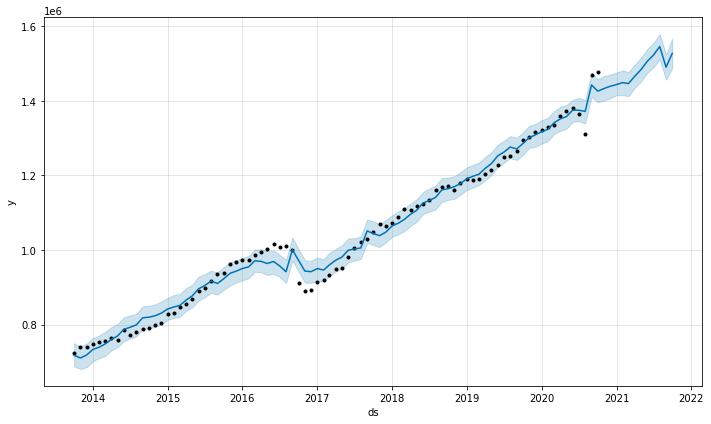

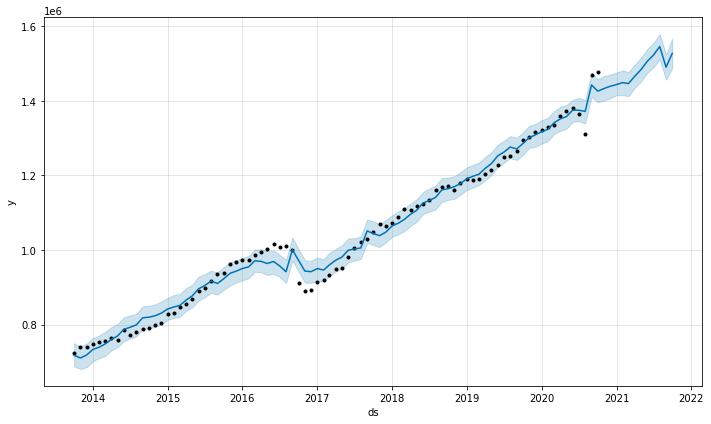

In [ ]:
m.plot(forecast)

In [ ]:
type(forecast)

pandas.core.frame.DataFrame

In [ ]:
df2=forecast.copy()
#df2[['ds'],['forecast']]=forecast[['ds'],['yhat']].copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      97 non-null     datetime64[ns]
 1   yhat    97 non-null     float64       
 2   y       85 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [ ]:
#df2=df2.drop(df2.columns.difference(['yhat'],['ds']),axis=1,inplace=True)
df2=df2.loc[:,df2.columns.intersection(['ds'])]
df2['yhat']=forecast['yhat']
df2['y']=total_sales1['y']

In [ ]:
df2.dropna(inplace=True)
r2_score(df2.y, df2.yhat)

0.985260907270671

In [ ]:
mean_squared_error(df2.y , df2.yhat)

574920523.7040662

In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name="Forecasted"),secondary_y=False)
figd.add_trace(go.Scatter(x=forecast['ds'], y=total_sales1['y'], name="Original"),secondary_y=False)

figd.update_layout(title_text="Retail Sales of Walmart")

figd.update_xaxes(title_text="Date")

figd.update_yaxes(title_text="Retail Sales(in Million US Dollars)", secondary_y=False)

figd.show()

In [ ]:
#ecommerce prediction
m1 = Prophet()
m1.fit(ecom_sales)
future2 = m1.make_future_dataframe(periods=12,freq='M')
future2.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
92,2021-05-31
93,2021-06-30
94,2021-07-31
95,2021-08-31
96,2021-09-30


In [ ]:
e_forecast = round(m1.predict(future2),2)
e_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
92,2021-05-31,235536.86,228349.33,242844.77
93,2021-06-30,244001.94,236718.58,250910.71
94,2021-07-31,233957.79,227087.24,241441.71
95,2021-08-31,245014.22,237409.62,251671.68
96,2021-09-30,255748.80,247682.72,263295.24


In [ ]:
df3=e_forecast.copy()
df3=df3.loc[:,df3.columns.intersection(['ds'])]
df3['yhat']=e_forecast['yhat']
df3['y']=ecom_sales['y']

In [ ]:
df3.dropna(inplace=True)
r2_score(df3.y, df3.yhat)

0.9890329054501604

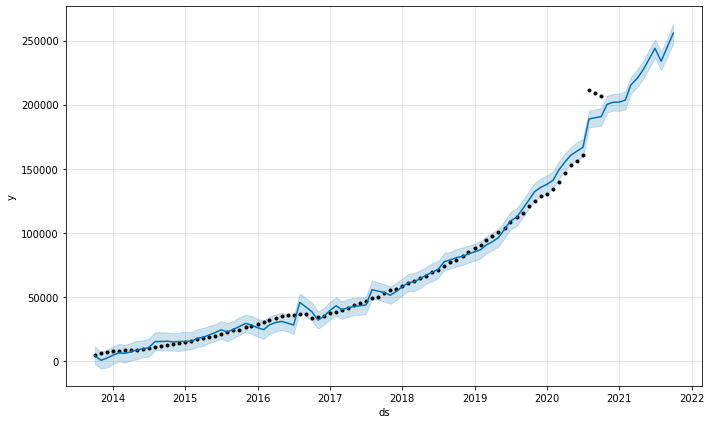

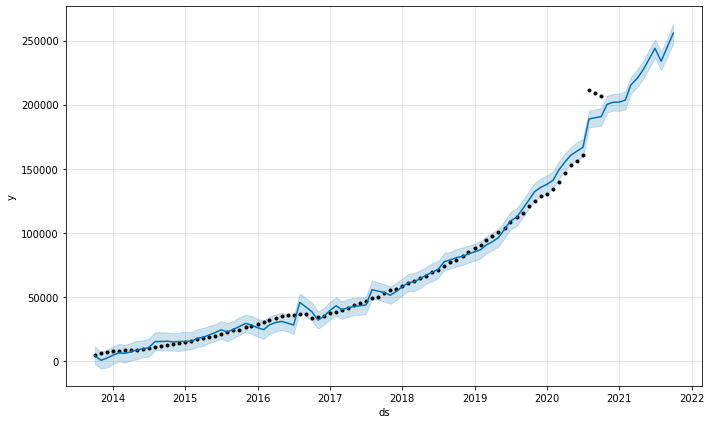

In [ ]:
m1.plot(e_forecast)

In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=e_forecast['ds'], y=e_forecast['yhat'], name="E-commerce-predicted+History"),secondary_y=False)
figd.add_trace(go.Scatter(x=e_forecast['ds'], y=ecom_sales['y'], name="E-commerce-History"),secondary_y=False)

figd.update_layout(title_text="E-Commerce Sales of Walmart")

figd.update_xaxes(title_text="Date")


figd.update_yaxes(title_text="E-Commerce Sales(in Million US Dollars)", secondary_y=False)

figd.show()

In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

layout_=go.Layout(title='Sales of Walmart',
    plot_bgcolor="#25383C",  # Sets background color to white
    xaxis=dict(
        title="Date",
        linecolor="#E5E4E2",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Sales",  
        linecolor="#E5E4E2",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
     )

figd=go.Figure(data=go.Scatter(x=sales['ds'], y=sales['y'], name="Sales of Walmart"),layout=layout_)
  
figd.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor

In [ ]:
sgd=SGDRegressor()
br=BayesianRidge()
ll=LassoLars()
ard=ARDRegression()
par=PassiveAggressiveRegressor()
tsr=TheilSenRegressor()

sgd.fit(X_train, Y_train)
br.fit(X_train, Y_train)
pred_y=sgd.predict(X_test)
pred_y1=br.predict(X_test)
ll.fit(X_train, Y_train)
pred_y2=ll.predict(X_test)
ard.fit(X_train,Y_train)
pred_y3=ard.predict(X_test)
par.fit(X_train, Y_train)
pred_y4=par.predict(X_test)
tsr.fit(X_train, Y_train)
pred_y5=tsr.predict(X_test)


mse1 = mean_squared_error(Y_test, ypred_f)
score1 = sgd.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score1, mse1, np.sqrt(mse1)))

mse2 = mean_squared_error(Y_test, pred_y)
score2 = sgd.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score2, mse2, np.sqrt(mse2)))
mse3 = mean_squared_error(Y_test, pred_y1)
score3 = br.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score3, mse3, np.sqrt(mse3)))
mse4 = mean_squared_error(Y_test, pred_y2)
score4 = ll.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score4, mse4, np.sqrt(mse4)))
mse5 = mean_squared_error(Y_test, pred_y3)
score5 = ard.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score5, mse5, np.sqrt(mse5)))
mse6 = mean_squared_error(Y_test, pred_y4)
score6 = par.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score6, mse6, np.sqrt(mse6)))
mse7 = mean_squared_error(Y_test, pred_y5)
score7 = tsr.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score7, mse7, np.sqrt(mse7)))



In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
score = regressor.score(X_test, Y_test)
mae = mean_absolute_error(Y_test,Y_pred)
print("R2:{0:.4f}, MSE:{1:.4f}, MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score, mse, mae,np.sqrt(mse)))
mse8 = mean_squared_error(Y_test, ypred1)
score8 = model.score(X_test, Y_test)
mae8 = mean_absolute_error(Y_test, ypred1)
print("R2:{0:.4f}, MSE:{1:.4f},MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score8, mse8, mae8,np.sqrt(mse8)))
mse9 = mean_squared_error(Y_test, y_pred1)
score9 = model1.score(X_test, Y_test)
mae2 = mean_absolute_error(Y_test, y_pred1)
print("R2:{0:.4f}, MSE:{1:.4f}, MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score9, mse9, mae2,np.sqrt(mse2)))

In [ ]:
MSE_=[mse1,mse,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9]
R2_=[score1,score,score2,score3,score4,score5,score6,score7,score8,score9]
Algorithm_=['fbProphet','Random Forest Regressor','SGD Regressor','Bayesian Ridge','Lasso Lars','ARD Regression','Passive Aggressive Regressor',
'TheilSen Regressor','ElasticNet CV','Linear Regression']
acc_t=pd.DataFrame()
acc_t['ALgorithm_']=Algorithm_
acc_t['MSE_']=MSE_
acc_t['R2_']=R2_
acc_t.sort_values(by='MSE_')

In [ ]:
#The function oriented

In [ ]:
def prophet_model(sales):

  m = Prophet()

  m.fit(sales)

  future = m.make_future_dataframe(periods=12,freq='M')

  forecast = round(m.predict(future),2)
  
  return forecast

In [ ]:
def add_forecasting(forecast,sales):
  #l=len(forecast['ds'])-12
  fc=forecast[['ds','yhat']].iloc[-12:]

  fc['y']=fc['yhat']

  sales=sales.append(fc)
  
  return sales

In [ ]:
def plot_graph(A,B):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  layout_=go.Layout(title='Sales of Walmart', xaxis_title='Date', yaxis_title='Sales in US Dollars' )

  figd=go.Figure(data=go.Scatter(x=A, y=B, name="Sales of Walmart"),layout=layout_)
  
  figd.show()
  #st.plotly_chart(figd)

In [ ]:
#Retail Sales of Walmart Prediction

In [ ]:
df=data_('/content/walmart_data(1).csv')
fc=prophet_model(df)
sales=add_forecasting(fc,df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#without forecasting
plot_graph(df['ds'],df['y'])

In [ ]:
#with forecasting
plot_graph(sales['ds'],sales['y'])

In [ ]:
algo=pd.read_csv('/content/algo.csv')

In [ ]:
algo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   Algorithm_  9 non-null      object 
 2   MSE_        9 non-null      float64
 3   R2_         9 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 416.0+ bytes


In [ ]:
dict1={'Random Forest Regressor':algo['R2_'][0],'SGD Regressor':algo['R2_'][1],'Bayesian Ridge':algo['R2_'][2],'Lasso Lars':algo['R2_'][3],'ARD Regression':algo['R2_'][4],'Passive Aggressive Regressor':algo['R2_'][5],'TheilSen Regressor':algo['R2_'][6],'ElasticNet CV':algo['R2_'][7],'Linear Regression':algo['R2_'][8]}

In [ ]:
dict1

{'ARD Regression': 0.9208200835175849,
 'Bayesian Ridge': 0.9214912394650521,
 'ElasticNet CV': 0.9198842532940792,
 'Lasso Lars': 0.922721913652771,
 'Linear Regression': 0.921089017359605,
 'Passive Aggressive Regressor': 0.9256702495569742,
 'Random Forest Regressor': 0.939265842037451,
 'SGD Regressor': 0.9225626170962241,
 'TheilSen Regressor': 0.9241531998264441}

In [ ]:
df1=data_('/content/ecom_walmart.csv')
fc1=prophet_model(df1)
sales1=add_forecasting(fc1,df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#without forecasting
plot_graph(df1['ds'],df1['y'])

NameError: ignored

In [ ]:
#with forecasting
plot_graph(sales1['ds'],sales1['y'])

In [ ]:
#Polar Chart for multiple sectors

In [ ]:
tm1=pd.read_excel('/content/Sectors-Adjusted-values.xlsx')



In [ ]:
tm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Date                                                                               120 non-null    object
 1   Retail and food services sales, total                                              120 non-null    int64 
 2   Retail sales and food services excl motor vehicle and parts                        120 non-null    int64 
 3   Retail sales and food services excl gasoline stations                              120 non-null    int64 
 4   Retail sales and food services excl motor vehicle and parts and gasoline stations  120 non-null    int64 
 5   Retail sales, total                                                                120 non-null    int64 
 6   Re

In [ ]:
tm2=tm1.head(12)

In [ ]:
tm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Date                                                                               12 non-null     object
 1   Retail and food services sales, total                                              12 non-null     int64 
 2   Retail sales and food services excl motor vehicle and parts                        12 non-null     int64 
 3   Retail sales and food services excl gasoline stations                              12 non-null     int64 
 4   Retail sales and food services excl motor vehicle and parts and gasoline stations  12 non-null     int64 
 5   Retail sales, total                                                                12 non-null     int64 
 6   Reta

In [ ]:
fig = go.Figure(data=go.Barpolar( 
    r=tm2['Date'], 
    theta=tm2['Clothing stores'], 
)) 
  
fig.show() 

In [2]:
df_s=pd.read_csv('/content/skincare - Sheet1.csv')

In [17]:
layout1=go.Layout(title='Increase in sales of skincare products during Lockdown for COVID19', xaxis_title='Percent Increase',yaxis_title='Product type')
fig =go.Figure(data=go.Bar(y=df_s['Product'],x=df_s['Percent_Increase'],orientation='h',marker=dict(color='#82CAFA',line=dict(color='#38ACEC',width=3))),layout=layout1)
fig.show() 

In [ ]:

import plotly.express as px 

df = px.data.tips() 

fig = px.treemap(df, path=['day', 'time', 'tip'], 
				values='total_bill') 

fig.show()


In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 264kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#Treemap Country-wise E-commerce

In [ ]:
tm3=pd.read_csv('/content/Brand_Value - Sheet1(1).csv')
tm3

,Brand,Brand Value 2020,Brand Value % Change\n 2020 Vs. 2019,Category,Country
0,lululemon,9.7,40,Apparel,Canada
1,Costco,28.7,35,Retail,United States
2,Amazon,415.9,32,Retail,United States
3,Target,10.6,32,Retail,United States
4,Walmart,45.8,24,Retail,United States
5,JD.com,25.5,24,Retail,China
6,Sam’s Club,6.8,19,Retail,United States
7,Alibaba,152.5,16,Retail,China
8,Tanishq,2.8,15,Retail,India
9,Flipkart,4.7,14,Retail,India


In [ ]:
fig1=px.treemap(tm3,path=['Country','Category','Brand'],
                values='Brand Value 2020',
                color='Brand Value 2020',color_discrete_sequence=px.colors.qualitative.Pastel)

In [ ]:
dir(px.colors.qualitative)

['Alphabet',
 'Alphabet_r',
 'Antique',
 'Antique_r',
 'Bold',
 'Bold_r',
 'D3',
 'D3_r',
 'Dark2',
 'Dark24',
 'Dark24_r',
 'Dark2_r',
 'G10',
 'G10_r',
 'Light24',
 'Light24_r',
 'Pastel',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'Pastel_r',
 'Plotly',
 'Plotly_r',
 'Prism',
 'Prism_r',
 'Safe',
 'Safe_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'T10',
 'T10_r',
 'Vivid',
 'Vivid_r',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_cols',
 '_contents',
 '_k',
 '_swatches',
 'swatches']

In [ ]:
fig1.show()

In [ ]:
walmart=pd.read_excel('/content/walmart_data(1)_Factors.xlsx')

In [ ]:
walmart.corr()

,y,Quality of Goods (in%),Product Examination (in%),All Payemnt Method Availability (in%),Personal Assistance (in%)
y,1.000000,0.866546,0.880873,0.956342,0.907997
Quality of Goods (in%),0.866546,1.000000,0.946557,0.960063,0.912316
Product Examination (in%),0.880873,0.946557,1.000000,0.960273,0.977199
All Payemnt Method Availability (in%),0.956342,0.960063,0.960273,1.000000,0.954851
Personal Assistance (in%),0.907997,0.912316,0.977199,0.954851,1.000000


In [ ]:
w_quality=pd.DataFrame()
w_quality[['ds','y']]=walmart[['ds','Quality of Goods (in%)']].copy()

In [ ]:
w_prodexam=pd.DataFrame()
w_prodexam[['ds','y']]=walmart[['ds','Product Examination (in%)']].copy()
w_allpay=pd.DataFrame()
w_allpay[['ds','y']]=walmart[['ds','All Payemnt Method Availability (in%)']].copy()
w_pa=pd.DataFrame()
w_pa[['ds','y']]=walmart[['ds','Personal Assistance (in%)']].copy()


In [ ]:
fc2=prophet_model(w_quality)
sales1=add_forecasting(fc2,w_quality)
plot_graph(sales1['ds'],sales1['y'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fc3=prophet_model(w_prodexam)
sales3=add_forecasting(fc3,w_prodexam)
plot_graph(sales3['ds'],sales3['y'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fc4=prophet_model(w_allpay)
sales4=add_forecasting(fc4,w_allpay)
plot_graph(sales4['ds'],sales4['y'])
fc5=prophet_model(w_pa)
sales5=add_forecasting(fc5,w_pa)
plot_graph(sales5['ds'],sales5['y'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=w_quality['ds'], y=w_quality['y'], name="Quality"),secondary_y=True)
figd.add_trace(go.Scatter(x=w_prodexam['ds'], y=w_prodexam['y'], name='Production Examination'),secondary_y=True)
figd.add_trace(go.Scatter(x=w_pa['ds'], y=w_pa['y'], name='Personal Assisstance'),secondary_y=True)
figd.add_trace(go.Scatter(x=w_allpay['ds'], y=w_allpay['y'], name="All payment methods"),secondary_y=True)
figd.add_trace(go.Scatter(x=walmart['ds'], y=walmart['y'], name="Retail Sales"),secondary_y=False)
#figd.add_trace(go.Scatter(x=e_forecast['ds'], y=ecom_sales['y'], name="E-commerce-History"),secondary_y=False)
figd.update_layout(title_text="Retail Sales of Walmart")

figd.update_xaxes(title_text="Date")


figd.update_yaxes(title_text="Retail Sales(in Million US Dollars)", secondary_y=False)

figd.show()

In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=sales1['ds'], y=sales1['y'], name="Quality"),secondary_y=True)
figd.add_trace(go.Scatter(x=sales3['ds'], y=sales3['y'], name='Production Examination'),secondary_y=True)
figd.add_trace(go.Scatter(x=sales4['ds'], y=sales4['y'], name='Personal Assisstance'),secondary_y=True)
figd.add_trace(go.Scatter(x=sales5['ds'], y=sales5['y'], name="All payment methods"),secondary_y=True)
figd.add_trace(go.Scatter(x=sales['ds'], y=sales['y'], name="Retail Sales"),secondary_y=False)
#figd.add_trace(go.Scatter(x=e_forecast['ds'], y=ecom_sales['y'], name="E-commerce-History"),secondary_y=False)
figd.update_layout(title_text="Retail Sales of Walmart")

figd.update_xaxes(title_text="Date")


figd.update_yaxes(title_text="Retail Sales(in Million US Dollars)", secondary_y=False)

figd.show()

In [ ]:
ecom=pd.read_excel('/content/ecom_walmart_Factors.xlsx')

In [ ]:
ecom.head()

,Date,Walmart E-commerce sales(in millions),Free Shipping (in %),Smooth Checkout Process (in %),Relevant Search Fuctionality (in %),Good Mobile Experience (in %)
0,2013-10-01,4476,20.11,31.0,70.0,38.00
1,2013-11-01,5691,24.90,31.1,70.5,42.00
2,2013-12-01,6465,24.60,32.2,71.0,43.88
3,2014-01-01,7419,27.33,32.0,72.3,45.00
4,2014-02-01,7840,29.00,31.8,72.0,46.71


In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=ecom['Date'], y=ecom['Walmart E-commerce sales(in millions)'], name="Sales"),secondary_y=False)
figd.add_trace(go.Scatter(x=ecom['Date'], y=ecom['Free Shipping (in %)'], name='shipping'),secondary_y=True)
figd.add_trace(go.Scatter(x=ecom['Date'], y=ecom['Smooth Checkout Process (in %)'], name='Checkout'),secondary_y=True)
figd.add_trace(go.Scatter(x=ecom['Date'] ,y=ecom['Relevant Search Fuctionality (in %)'], name="Search Functionality"),secondary_y=True)
figd.add_trace(go.Scatter(x=ecom['Date'], y=ecom['Good Mobile Experience (in %)'], name="Mobile Exp"),secondary_y=True)
#figd.add_trace(go.Scatter(x=e_forecast['ds'], y=ecom_sales['y'], name="E-commerce-History"),secondary_y=False)
figd.update_layout(title_text="Retail Sales of Walmart")

figd.update_xaxes(title_text="Date")


figd.update_yaxes(title_text="Retail Sales(in Million US Dollars)", secondary_y=False)

figd.show()

In [ ]:
dir(px.colors.qualitative)

['Alphabet',
 'Alphabet_r',
 'Antique',
 'Antique_r',
 'Bold',
 'Bold_r',
 'D3',
 'D3_r',
 'Dark2',
 'Dark24',
 'Dark24_r',
 'Dark2_r',
 'G10',
 'G10_r',
 'Light24',
 'Light24_r',
 'Pastel',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'Pastel_r',
 'Plotly',
 'Plotly_r',
 'Prism',
 'Prism_r',
 'Safe',
 'Safe_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'T10',
 'T10_r',
 'Vivid',
 'Vivid_r',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_cols',
 '_contents',
 '_k',
 '_swatches',
 'swatches']

In [ ]:
def tree_map_disp():
  tm=pd.read_csv('/content/Brand_Value - Sheet1(1).csv')
  fig1=px.treemap(tm,path=['Country','Category','Brand'],
                values='Brand Value 2020',
                color='Brand Value 2020', color_discrete_sequence=px.colors.qualitative.Pastel1)
  fig1.show()

In [ ]:
tree_map_disp()

TypeError: ignored

In [ ]:
def data_ecom_walmart(file1):

  df1=pd.read_csv(file1)

  df1.columns=['ds','y']

  df1['ds']=pd.to_datetime(df1['ds'])

  sales=df1.copy()

  sales.columns=['ds','y']

  return sales

def prophet_model(sales):

  m = Prophet()

  m.fit(sales)

  future = m.make_future_dataframe(periods=12,freq='M')

  forecast = round(m.predict(future),2)
  
  return forecast

def add_forecasting(forecast,sales):
  #l=len(forecast['ds'])-12
  fc=forecast[['ds','yhat']].iloc[-12:]

  fc['y']=fc['yhat']

  sales=sales.append(fc)
  
  return sales

def plot_graph(A,B):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  layout_=go.Layout(title='Sales of Walmart', xaxis_title='Date', yaxis_title='Sales in US Dollars' )

  figd=go.Figure(data=go.Scatter(x=A, y=B, name="Sales of Walmart"),layout=layout_)
  
  figd.show()


#Main Function
df=data_('/content/walmart_data(1).csv')
fc=prophet_model(df)
sales=add_forecasting(fc,df)

#Ecommerce Main
df1=data_('/content/ecom_walmart.csv')
fc1=prophet_model(df1)
sales1=add_forecasting(fc1,df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#without forecasting
plot_graph(df['ds'],df['y'])

#with forecasting
plot_graph(sales['ds'],sales['y'])

In [ ]:
#without forecasting
plot_graph(df1['ds'],df1['y'])

#with forecasting
plot_graph(sales1['ds'],sales1['y'])

In [ ]:
df2=pd.read_csv('/content/Ranking_ecom1.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              31 non-null     object
 1   Goods             31 non-null     object
 2   Increase percent  31 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


In [ ]:
df2

,Rank,Goods,Increase percent
0,#1,Disposable Gloves,670
1,#2,Bread Machines,652
2,#3,Cough & Cold,535
3,#4,Soups,397
4,#5,Dried Grains & Rice,386
5,#6,Packaged Foods,377
6,#7,Fruit Cups,326
7,#8,Weight Training,307
8,#9,Milk & Cream,279
9,#10,Dishwashing Supplies,275


In [ ]:
def ranking_graph():
  df1=pd.read_excel('/content/Ranking_ecom(1).xlsx')
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df1['Goods'],y=df1['Increase percent'],name='Ecommerce purchase increase during Lockdown',fill='tozeroy',line=dict(color='lightskyblue')))
#fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
  fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
  fig.update_traces(opacity=0.75)
  fig.show()

ranking_graph()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df1['Goods'],name='Ecommerce purchase increase during Lockdown'))
#fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [ ]:
tm1=pd.read_csv('/content/Review_sectors2.csv')
tm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Review Website             10 non-null     object 
 1   U.S. Alexa Ranking         10 non-null     int64  
 2   Reviews Best For           10 non-null     object 
 3   Avg. Monthly U.S. Traffic  10 non-null     object 
 4   % U.S. Traffic (of Total)  10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes


In [ ]:
tm1

,Review Website,U.S. Alexa Ranking,Reviews Best For,Avg. Monthly U.S. Traffic,% U.S. Traffic (of Total)
0,Google My Business,1,any business,158.03 million,19.6
1,Amazon,3,e-commerce related,85.44 million,63.6
2,Facebook,4,any business,85.57 million,23.1
3,Yelp,64,any business,40.47 million,87.5
4,Trip Advisor,118,"related to food, restaurant, travel",28.27 million,50.4
5,BBB (Better Business Bureau),647,any business,6.15 million,72.1
6,Yellowpages,694,any business,10.5 million,70.0
7,Manta,957,any business,6.48 million,67.0
8,Angies List,1755,service related business,5.44 million,72.4
9,Foursquare,2418,"any business, mostly restaurants",3.67 million,19.3


In [ ]:
#tm=pd.read_csv('/content/Brand_Value - Sheet1(1).csv')
def treemap_1():
  tm1=pd.read_excel('/content/Review_sectors.xlsx')
  fig1=px.treemap(tm1,path=['Reviews Best For','Review Website','U.S. Alexa Ranking'],
                values='% U.S. Traffic (of Total)',color_discrete_sequence=px.colors.qualitative.Pastel1,
                color='% U.S. Traffic (of Total)')
  fig1.show()

treemap_1()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
